In [1]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
import numpy as np

In [3]:
np.random.seed(0)

In [4]:
np.random.rand(3,3)

array([[0.5488135 , 0.71518937, 0.60276338],
       [0.54488318, 0.4236548 , 0.64589411],
       [0.43758721, 0.891773  , 0.96366276]])

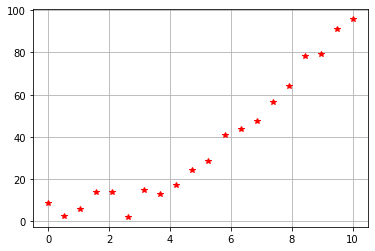

In [34]:
np.random.seed(0)
xx = np.linspace(0, 10, 20).reshape((20, 1))
yy = xx ** 2 + np.random.normal(scale=5, size=(20, 1))
plt.plot(xx, yy, "r*")
plt.grid()


In [35]:
new_xx = np.hstack((xx, xx ** 2))
model = LinearRegression()
model.fit(new_xx, yy)

LinearRegression()

In [36]:
model.intercept_

array([6.21354908])

In [37]:
model.coef_

array([[-0.90036019,  1.03317473]])

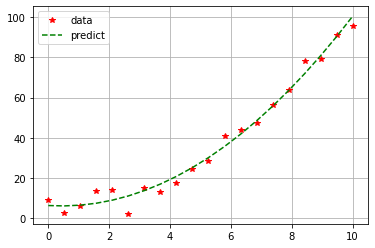

In [39]:
plt.plot(xx, yy, "r*", label="data")
plt.plot(xx, new_xx[:,0] * model.coef_[0][0] + new_xx[:,1] * model.coef_[0][1] + model.intercept_[0], "g--", label="predict")
plt.legend()
plt.grid()

In [41]:
r2_score(yy, model.predict(new_xx))

0.9834273719573036

---

In [43]:
from sklearn.datasets import make_blobs, make_circles

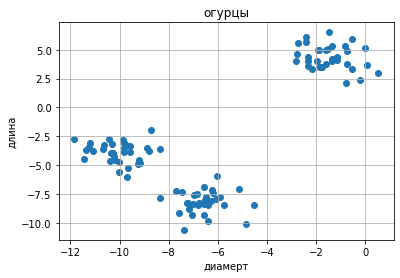

In [67]:
np.random.seed(1)
X, _ = make_blobs(100)
plt.scatter(X[:,0], X[:,1])
plt.xlabel("диамерт")
plt.ylabel("длина")
plt.title("огурцы")
plt.grid()

In [68]:
np.linalg.norm(X[0] - X[1])

10.84906914156338

$$
||X_1 - X_2||
$$

норма разности двух векторов - расстояние между ними

агломеративная кластеризация (иерархическая)

In [69]:
def prepare_data(data):
    new_data = [[i] for i in data]
    return new_data

In [70]:
def find_distance_between_2_points(p1, p2):
    return np.linalg.norm(p1 - p2)

In [71]:
def find_distance_between_2_clasters(c1, c2):
    total_distance = 0
    for p1 in c1:
        for p2 in c2:
            total_distance += find_distance_between_2_points(p1, p2)
    return total_distance / len(c1) / len(c2)

In [74]:
def aglomerative_clasters(data, num_clasters):
    data = prepare_data(data)
    while len(data) > num_clasters:
        index1 = index2 = None
        best_distance = float("inf")
        for index_c1, _ in enumerate(data):
            for index_c2 in range(index_c1 + 1, len(data)):
                d = find_distance_between_2_clasters(data[index_c1], data[index_c2])
                if d < best_distance:
                    best_distance = d
                    index1 = index_c1
                    index2 = index_c2
        data[index1].extend(data[index2])
        data[index2] = []
        data = [i for i in data if i]
    return data

In [76]:
c1, c2, c3 = aglomerative_clasters(X, 3)

In [79]:
c1 = np.vstack(c1)
c2 = np.vstack(c2)
c3 = np.vstack(c3)

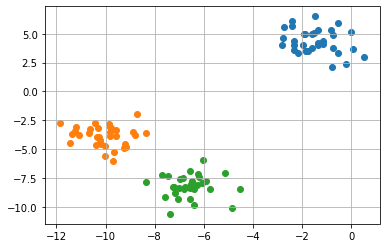

In [82]:
plt.scatter(c1[:,0], c1[:,1])
plt.scatter(c2[:,0], c2[:,1])
plt.scatter(c3[:,0], c3[:,1])
plt.grid()

---

In [85]:
from sklearn.cluster import AgglomerativeClustering

In [89]:
model = AgglomerativeClustering(n_clusters=5)
model.fit(X);

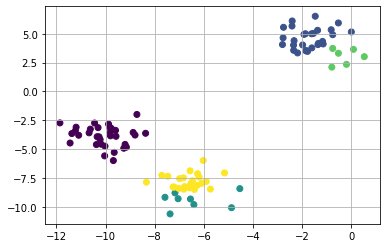

In [90]:
plt.scatter(X[:,0], X[:,1], c=model.labels_)
plt.grid()

---

In [91]:
from sklearn.cluster import k_means

In [99]:
kernels, labels, length = k_means(X, n_clusters=3) #n_jobs - количесво ядер

In [103]:
kernels

array([[ -6.58196786,  -8.17239339],
       [-10.04935243,  -3.85954095],
       [ -1.4710815 ,   4.33721882]])

In [104]:
labels

array([2, 1, 1, 1, 0, 0, 0, 1, 2, 2, 1, 1, 0, 2, 0, 0, 0, 2, 1, 1, 0, 1,
       0, 2, 1, 0, 0, 2, 2, 0, 2, 2, 0, 2, 1, 0, 1, 1, 1, 0, 0, 1, 2, 1,
       1, 0, 2, 2, 2, 2, 1, 0, 0, 0, 2, 0, 1, 1, 2, 2, 1, 0, 0, 1, 1, 0,
       2, 0, 2, 1, 1, 1, 0, 2, 2, 1, 0, 0, 2, 1, 2, 1, 1, 0, 2, 2, 2, 2,
       1, 2, 0, 2, 2, 1, 1, 0, 0, 2, 0, 2], dtype=int32)

In [105]:
length

156.28289251170003

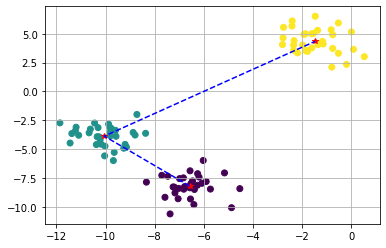

In [109]:
plt.scatter(X[:,0], X[:,1], c=labels)
plt.plot(kernels[:,0], kernels[:,1], "r*")
plt.plot(kernels[:,0], kernels[:,1], "b--")
plt.grid()

---

In [111]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

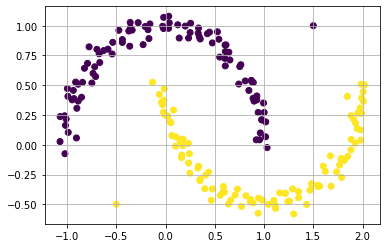

In [119]:
np.random.seed(0)
data, label = make_moons(200, noise=.05)
data[0] = np.array([1.5, 1])
data[1] = np.array([-.5, -.5])
plt.scatter(data[:,0], data[:,1], c=label)
plt.grid()

In [122]:
model = DBSCAN(eps=0.3)
model.fit(data)
model.labels_

array([-1, -1,  0,  1,  0,  0,  1,  0,  1,  0,  1,  0,  0,  0,  1,  1,  1,
        0,  1,  1,  0,  0,  1,  0,  1,  0,  0,  0,  0,  1,  1,  1,  0,  0,
        1,  0,  0,  1,  1,  0,  0,  1,  1,  0,  0,  1,  1,  1,  0,  0,  1,
        0,  0,  1,  0,  1,  1,  0,  1,  1,  0,  1,  0,  1,  0,  1,  1,  0,
        1,  1,  0,  1,  0,  0,  0,  1,  0,  1,  1,  0,  0,  1,  0,  0,  0,
        1,  1,  1,  0,  0,  1,  1,  0,  1,  0,  0,  0,  0,  1,  0,  0,  0,
        1,  1,  1,  0,  1,  1,  0,  1,  1,  1,  1,  1,  1,  0,  1,  0,  0,
        1,  1,  1,  0,  1,  0,  1,  1,  0,  0,  0,  1,  1,  1,  0,  0,  0,
        0,  1,  0,  1,  0,  0,  1,  1,  1,  1,  0,  0,  1,  0,  0,  0,  1,
        1,  0,  1,  0,  0,  1,  1,  0,  0,  1,  0,  0,  0,  1,  0,  0,  0,
        1,  1,  1,  1,  0,  0,  0,  1,  1,  1,  0,  1,  0,  0,  0,  1,  1,
        0,  1,  1,  1,  1,  1,  1,  0,  1,  0,  0,  1,  0])

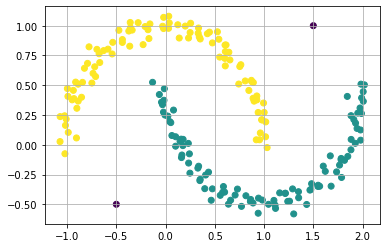

In [123]:
plt.scatter(data[:,0], data[:,1], c=model.labels_)
plt.grid()